In [35]:
import numpy as np
#import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Explore data analysis

We first import our dataset

In [4]:
data_train = pd.read_csv('trainingData.csv')
data_test = pd.read_csv('validationData.csv')

In [4]:
data_train

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [5]:
data_test.shape

(1111, 529)

We see that the count is the same for all the WAP's and all of the features(longitude, latitude and floor). We drop the features that are not necessary and not interesting for our models(Building ID, PhoneID....)

# Scaling our dataset so that the predictions are more accurate

In [5]:
X_train = data_train.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID','SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis =1)
X_test = data_test.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID','SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis =1)

y_train = data_train[['LONGITUDE','LATITUDE','FLOOR']]
y_test = data_test[['LONGITUDE','LATITUDE','FLOOR']]



In [7]:
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


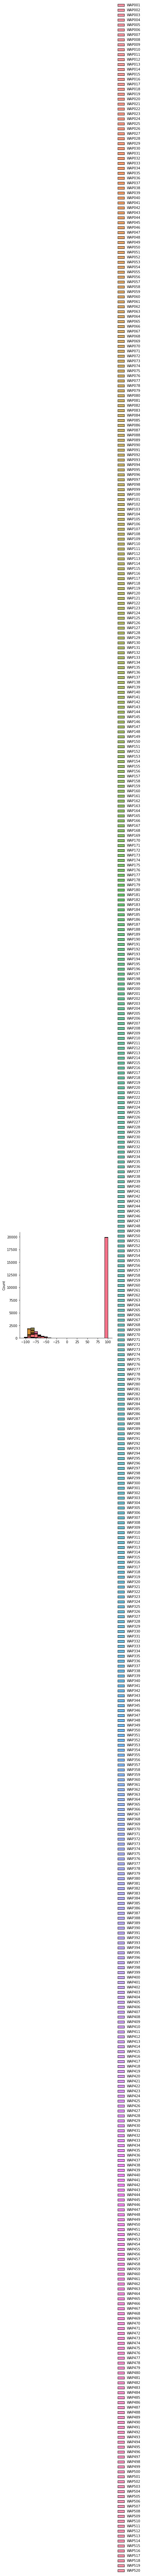

In [54]:
sns.displot(X_train)

We can see that the dataset has a huge part of undetected WAP and so we must clean our data

# Dividing our dataset and separating the columns

In [6]:
latitude_train = data_train['LATITUDE']
longitude_train = data_train['LONGITUDE']
floor_train = data_train['FLOOR']

latitude_test = data_test['LATITUDE']
longitude_test = data_test['LONGITUDE']
floor_test = data_test['FLOOR']

# Scaling of our dataset (for better performance)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std_train = sc.fit_transform(X_train)
X_std_test = sc.transform(X_test)

In [8]:
X_std_train.shape

(19937, 520)

# We try using different machine learning models

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import neighbors 
from sklearn.svm import SVR


In [80]:
floorClassifier = KNeighborsClassifier()
regression_model= LinearRegression()
model_svm = SVR()
knnModel = neighbors.KNeighborsRegressor(2)

# Linear Regression model

In [17]:
print("for latitude")
regression_model.fit(X_std_train,latitude_train)
regression_model.score(X_std_test,latitude_test)

for latitude


-4.907690225513307e+25

# KNN model

In [81]:
print("For longitude using knn")
start = time.time()
knnModel.fit(X_std_train,longitude_train)
end = time.time()
print("time for KNN fitting is ", end - start)
start2 = time.time()
result = knnModel.score(X_std_test,longitude_test)
end2 = time.time()
print("time for KNN scoring is ", end2 - start2)
print("the accuracy is ", result)

For longitude using knn
time for KNN fitting is  2.6824939250946045
time for KNN scoring is  5.842025995254517
the accuracy is  0.9587314321911274


In [82]:
print("for latitude")
knnModel.fit(X_std_train,latitude_train)
print("the accuracy is")
knnModel.score(X_std_test,latitude_test)

for latitude
the accuracy is


0.9212451723594032

In [83]:
print("Floor classifier model")
start = time.time()
floorClassifier.fit(X_std_train,floor_train)
end = time.time()
print("time for KNN floor fitting is ", end - start)
start2 = time.time()
result = floorClassifier.score(X_std_test,floor_test)
end2 = time.time()
print("time for KNN floor scoring is ", end2 - start2)
print("the accuracy is ", result)

Floor classifier model
time for KNN floor fitting is  2.305819272994995
time for KNN floor scoring is  6.814572811126709
the accuracy is  0.6552655265526552


# Decision tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

regr_2 = DecisionTreeRegressor(max_depth=9)
regr_classify = DecisionTreeClassifier()

In [72]:
print("For latitude using Decision Tree Regressor")
start = time.time()
regr_2.fit(X_std_train,latitude_train)
end = time.time()
print("time for fitting is ", end - start)
start2 = time.time()
result = regr_2.score(X_std_test,latitude_test)
end2 = time.time()
print("time for scoring is ", end2 - start2)
print("the accuracy is ", result)

For latitude using Decision Tree Regressor
time for fitting is  0.5116629600524902
time for scoring is  0.0028541088104248047
the accuracy is  0.8004960706539345


In [64]:
print("For longitude using Decision Tree Regressor")
regr_2.fit(X_std_train,longitude_train)
print("the accuracy is ")
regr_2.score(X_std_test,longitude_test)

For longitude using Decision Tree Regressor
the accuracy is 


0.7956178047303396

In [76]:
print("Floor classifier model")
start = time.time()
regr_classify.fit(X_std_train,floor_train)
end = time.time()
print("time for DT fitting is ", end - start)
start2 = time.time()
result = regr_classify.score(X_std_test,floor_test)
end2 = time.time()
print("time for DT scoring is ", end2 - start2)
print("the accuracy is ", result)

Floor classifier model
time for DT fitting is  0.9755480289459229
time for DT scoring is  0.0020580291748046875
the accuracy is  0.7425742574257426


# Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.naive_bayes import MultinomialNB
gnb2 =  MultinomialNB()
from sklearn.naive_bayes import BernoulliNB
gnb3 = BernoulliNB()

In [73]:
print("For latitude using Gaussian Naive Bayes")
start = time.time()
gnb.fit(X_std_train,latitude_train.astype('int'))
end = time.time()
print("time for Gaussian NB fitting is ", end - start)
start2 = time.time()
result = gnb.score(X_std_test,latitude_test.astype('int'))
end2 = time.time()
print("time for Gaussian NB scoring is ", end2 - start2)
print("the accuracy is ", result)

For latitude using Gaussian Naive Bayes
time for Gaussian NB fitting is  0.5145728588104248
time for Gaussian NB scoring is  0.9603569507598877
the accuracy is  0.0666066606660666


In [13]:
print("For longitude using Gaussian Naive Bayes")
gnb.fit(X_std_train,longitude_train.astype('int'))
print("the accuracy is ")
gnb.score(X_std_test,longitude_test.astype('int'))

For longitude using Gaussian Naive Bayes
the accuracy is 


0.07290729072907291

In [63]:
print("For floor using Gaussian Naive Bayes")
start = time.time()
gnb.fit(X_std_train,floor_train.astype('int'))
end = time.time()
print("time for Gaussian NB fitting is ", end - start)
start2 = time.time()
result = gnb.score(X_std_test,floor_test.astype('int'))
end2 = time.time()
print("time for Gaussian NB scoring is ", end2 - start2)
print("the accuracy is ", result)

For floor using Gaussian Naive Bayes
time for Gaussian NB fitting is  0.4140129089355469
time for Gaussian NB scoring is  0.03629302978515625
the accuracy is  0.3582358235823582


So as the result above, the performance of Gaussian Naive Bayes is much worse than KNN, DT and RF, even as the best performance, which is the prediction of floor has just 35% of the accuracy, but it uses the least amount of time.

In [12]:
#we do not use the Mutinomial Naive Bayes since the accuracy is too low
print("For latitude using Mutinomial Naive Bayes")
gnb2.fit(abs(X_std_train),longitude_train.astype('int'))
print("the accuracy is ")
gnb2.score(abs(X_std_test),longitude_test.astype('int'))

For latitude using Mutinomial Naive Bayes
the accuracy is 


0.05310531053105311

In [14]:
#we do not use the Bernoulli Naive Bayes since the accuracy is too low
print("For longitude using Bernoulli Naive Bayes")
gnb3.fit(X_std_train,longitude_train.astype('int'))
print("the accuracy is ")
gnb3.score(X_std_test,longitude_test.astype('int'))

For longitude using Bernoulli Naive Bayes
the accuracy is 


0.10711071107110712

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestRegressor(max_depth=9)
rand_forest_classify = RandomForestClassifier()

In [49]:
print("For latitude using Random Forest Regressor")
start = time.time()
rand_forest.fit(X_std_train,latitude_train)
end = time.time()
print("time for RF fitting is ", end - start)
start2 = time.time()
result = rand_forest.score(X_std_test,latitude_test)
end2 = time.time()
print("time for RF scoring is ", end2 - start2)
print("the accuracy is ", result)

For latitude using Random Forest Regressor
time for RF fitting is  28.354560136795044
time for RF scoring is  0.018136024475097656
the accuracy is  0.8433190755341298


In [60]:
print("For longitude using Random Forest Regressor")
rand_forest.fit(X_std_train,longitude_train)
print("the accuracy is ")
rand_forest.score(X_std_test,longitude_test)

For longitude using Random Forest Regressor
the accuracy is 


0.8266651933605006

In [19]:
print("for latitude")
knnModel.fit(X_std_train,latitude_train)
print("the accuracy is")
knnModel.score(X_std_test,latitude_test)

for latitude
the accuracy is


0.9276728126299123

In [48]:
print("Floor classifier model")
start = time.time()
rand_forest_classify.fit(X_std_train,floor_train)
end = time.time()
print("time for RF floor fitting is ", end - start)
start2 = time.time()
result = rand_forest_classify.score(X_std_test,floor_test)
end2 = time.time()
print("time for RF floor scoring is ", end2 - start2)
print("the accuracy is ", result)

Floor classifier model
time for RF floor fitting is  5.1197288036346436
time for RF floor scoring is  0.049666643142700195
the accuracy is  0.873087308730873


we can see that the performance of RF is similar to but better than DT in all aspects, but it is still worse than KNN for the longitude and latitude. However, the prediction of the floor is better than that in KNN, just like the performance of DT compared with KNN.

# Another test for KNN (just for testing, not sure whether we will use it or not)

In [62]:
def test_KNeighborsRegressor_k_w(*data):
    X_train,X_test,y_train,y_test =data
    Ks=np.linspace(1,y_train.size,num=100,endpoint=False,dtype='int')
    weights=['uniform','distance']
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr=neighbors.KNeighborsRegressor(weights=weight,
                n_neighbors=K)
            regr.fit(X_train,y_train.astype('int'))
            testing_scores.append(regr.score(X_test,y_test)
            training_scores.append(regr.score(X_train,y_train)
        ax.plot(Ks,testing_scores,label='testing score:weight=%s'%weight)
        ax.plot(Ks,training_scores,label='training score:weight=%s'%weight)
        ax.legend(loc='best')
        ax.set_xlabel('K')
        ax.set_ylabel('score')
        ax.set_ylim(0,1.05)
        ax.set_title('KNeighborsRegressor')
        plt.show()



SyntaxError: invalid syntax (<ipython-input-62-22b6e65f0749>, line 16)

KeyboardInterrupt: 

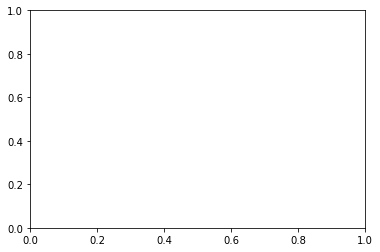

In [59]:
test_KNeighborsRegressor_k_w(X_std_train, X_std_test, latitude_train, latitude_test)  